In [77]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Clustering
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2, whiten
from sklearn.cluster import KMeans
from sklearn import metrics
import math

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# from acquire_zillow import get_zillow_data_2016
# from acquire_zillow import save_df_2016

# import summarize
# import prepare

## Alternate import: from local CSV file

In [5]:
path = '~/Documents/Coding/Codeup/Coursework/ds-methodologies-exercises/clustering/'
file1 = '2016_Zillow_Data.csv'

In [6]:
df_2016 = pd.read_csv(path+file1)
df_2016.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc,id.1,parcelid.1,logerror,transactiondate
0,2931667,11016594,1.00,nan,nan,2.00,3,nan,4.00,2.00,...,261,Single Family Residential,nan,NaN,nan,NaN,0,11016594,0.03,2016-01-01
1,475764,14366692,nan,nan,nan,3.50,4,nan,nan,3.50,...,261,Single Family Residential,nan,NaN,nan,NaN,1,14366692,-0.17,2016-01-01
2,2444575,12098116,1.00,nan,nan,3.00,2,nan,4.00,3.00,...,261,Single Family Residential,nan,NaN,nan,NaN,2,12098116,-0.00,2016-01-01
3,1584730,12643413,1.00,nan,nan,2.00,2,nan,4.00,2.00,...,266,Condominium,nan,NaN,nan,NaN,3,12643413,0.02,2016-01-02
4,2926916,14432541,nan,nan,nan,2.50,4,nan,nan,2.50,...,261,Single Family Residential,nan,NaN,nan,NaN,4,14432541,-0.01,2016-01-02


In [7]:
file2 = '2017_Zillow_Data.csv'

In [8]:
df_2017 = pd.read_csv(path+file2)
df_2017.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc,id.1,parcelid.1,logerror,transactiondate
0,1727539,14297519,nan,nan,nan,3.50,4.00,nan,nan,3.50,...,261.00,Single Family Residential,nan,NaN,nan,NaN,0,14297519,0.03,2017-01-01
1,1387261,17052889,nan,nan,nan,1.00,2.00,nan,nan,1.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,1,17052889,0.06,2017-01-01
2,11677,14186244,nan,nan,nan,2.00,3.00,nan,nan,2.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,2,14186244,0.01,2017-01-01
3,2288172,12177905,nan,nan,nan,3.00,4.00,nan,8.00,3.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,3,12177905,-0.10,2017-01-01
4,1970746,10887214,1.00,nan,nan,3.00,3.00,nan,8.00,3.00,...,266.00,Condominium,nan,NaN,nan,NaN,4,10887214,0.01,2017-01-01


In [9]:
df_2017.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [10]:
df_2017.reset_index()

,index,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc,id.1,parcelid.1,logerror,transactiondate
0,0,1727539,14297519,nan,nan,nan,3.50,4.00,nan,nan,...,261.00,Single Family Residential,nan,NaN,nan,NaN,0,14297519,0.03,2017-01-01
1,1,1387261,17052889,nan,nan,nan,1.00,2.00,nan,nan,...,261.00,Single Family Residential,nan,NaN,nan,NaN,1,17052889,0.06,2017-01-01
2,2,11677,14186244,nan,nan,nan,2.00,3.00,nan,nan,...,261.00,Single Family Residential,nan,NaN,nan,NaN,2,14186244,0.01,2017-01-01
3,3,2288172,12177905,nan,nan,nan,3.00,4.00,nan,8.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,3,12177905,-0.10,2017-01-01
4,4,1970746,10887214,1.00,nan,nan,3.00,3.00,nan,8.00,...,266.00,Condominium,nan,NaN,nan,NaN,4,10887214,0.01,2017-01-01
5,5,1447245,17143294,nan,nan,nan,2.00,3.00,nan,nan,...,266.00,Condominium,nan,NaN,nan,NaN,5,17143294,-0.02,2017-01-01
6,6,781532,12095076,1.00,nan,nan,3.00,4.00,nan,9.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,6,12095076,-0.00,2017-01-01
7,7,870991,12069064,nan,nan,nan,1.00,2.00,nan,5.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,7,12069064,0.10,2017-01-01
8,8,1246926,12790562,nan,nan,nan,3.00,4.00,nan,9.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,8,12790562,-0.04,2017-01-02
9,9,1585097,11542646,nan,nan,nan,3.00,2.00,nan,8.00,...,266.00,Condominium,nan,NaN,nan,NaN,9,11542646,-0.04,2017-01-02


In [11]:
# Concatenates 2016 and 2017 df

In [12]:
df = pd.concat([df_2016, df_2017], axis=0)

## Summarize Data

In [13]:
def peekatdata(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())
    return df

def df_value_counts(df):
    for col in df.columns: 
        n = df[col].unique().shape[0] 
        col_bins = min(n,10) 
        if df[col].dtype in ['int64','float64'] and n > 10:
            print('%s:' % col)
            print(df[col].value_counts(bins=col_bins, sort=False)) 
        else: 
            print(df[col].value_counts()) 
        print('\n')
    return df

In [14]:
peekatdata(df)


Rows & Columns:

(167888, 77)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 77 columns):
id                              167888 non-null int64
parcelid                        167888 non-null int64
airconditioningtypeid           53788 non-null float64
architecturalstyletypeid        468 non-null float64
basementsqft                    93 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
buildingclasstypeid             31 non-null float64
buildingqualitytypeid           107173 non-null float64
calculatedbathnbr               166056 non-null float64
decktypeid                      1272 non-null float64
finishedfloor1squarefeet        12893 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
finishedsquarefeet13            75 non-null float64
finishedsquarefeet15       

id                                   0
parcelid                             0
airconditioningtypeid           114100
architecturalstyletypeid        167420
basementsqft                    167795
bathroomcnt                         34
bedroomcnt                          34
buildingclasstypeid             167857
buildingqualitytypeid            60715
calculatedbathnbr                 1832
decktypeid                      166616
finishedfloor1squarefeet        154995
calculatedfinishedsquarefeet       896
finishedsquarefeet12              8369
finishedsquarefeet13            167813
finishedsquarefeet15            161297
finishedsquarefeet50            154995
finishedsquarefeet6             167081
fips                                34
fireplacecnt                    149992
fullbathcnt                       1832
garagecarcnt                    112431
garagetotalsqft                 112431
hashottuborspa                  163984
heatingorsystemtypeid            62237
latitude                 

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc,id.1,parcelid.1,logerror,transactiondate
0,2931667,11016594,1.00,nan,nan,2.00,3.00,nan,4.00,2.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,0,11016594,0.03,2016-01-01
1,475764,14366692,nan,nan,nan,3.50,4.00,nan,nan,3.50,...,261.00,Single Family Residential,nan,NaN,nan,NaN,1,14366692,-0.17,2016-01-01
2,2444575,12098116,1.00,nan,nan,3.00,2.00,nan,4.00,3.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,2,12098116,-0.00,2016-01-01
3,1584730,12643413,1.00,nan,nan,2.00,2.00,nan,4.00,2.00,...,266.00,Condominium,nan,NaN,nan,NaN,3,12643413,0.02,2016-01-02
4,2926916,14432541,nan,nan,nan,2.50,4.00,nan,nan,2.50,...,261.00,Single Family Residential,nan,NaN,nan,NaN,4,14432541,-0.01,2016-01-02
5,2843942,11509835,1.00,nan,nan,4.00,4.00,nan,1.00,4.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,5,11509835,-0.27,2016-01-02
6,1628001,12286022,nan,nan,nan,1.00,2.00,nan,7.00,1.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,6,12286022,0.04,2016-01-02
7,2543293,17177301,nan,nan,nan,2.50,3.00,nan,nan,2.50,...,266.00,Condominium,nan,NaN,nan,NaN,7,17177301,0.16,2016-01-02
8,519006,14739064,nan,nan,nan,1.00,2.00,nan,nan,1.00,...,266.00,Condominium,nan,NaN,nan,NaN,8,14739064,-0.00,2016-01-02
9,1604540,14677559,nan,nan,nan,2.00,2.00,nan,nan,2.00,...,266.00,Condominium,nan,NaN,nan,NaN,9,14677559,0.08,2016-01-03


In [15]:
df_value_counts(df)

id:
(-2635.8340000000003, 298832.3]    16864
(298832.3, 597315.6]               16755
(597315.6, 895798.9]               16605
(895798.9, 1194282.2]              16715
(1194282.2, 1492765.5]             16941
(1492765.5, 1791248.8]             16844
(1791248.8, 2089732.1]             16868
(2089732.1, 2388215.4]             16811
(2388215.4, 2686698.7]             16886
(2686698.7, 2985182.0]             16599
Name: id, dtype: int64


parcelid:
(10554760.42, 26409495.9]     167841
(26409495.9, 42107253.8]           0
(42107253.8, 57805011.7]           0
(57805011.7, 73502769.6]           0
(73502769.6, 89200527.5]           1
(89200527.5, 104898285.4]          4
(104898285.4, 120596043.3]         0
(120596043.3, 136293801.2]         0
(136293801.2, 151991559.1]         0
(151991559.1, 167689317.0]        42
Name: parcelid, dtype: int64


 1.00    49854
13.00     3408
 5.00      382
11.00      116
 9.00       27
 3.00        1
Name: airconditioningtypeid, dtype: int64


 7.00    394
 8.

(30.755, 55.4]        33
(55.4, 79.8]           0
(79.8, 104.2]          0
(104.2, 128.6]         0
(128.6, 153.0]         0
(153.0, 177.4]         0
(177.4, 201.8]         0
(201.8, 226.2]         0
(226.2, 250.6]      7173
(250.6, 275.0]    160648
Name: propertylandusetypeid, dtype: int64


LAR1          14444
LAR3           5251
LARS           2897
LBR1N          2684
LARD1.5        2437
LAR2           2320
SCUR2          2061
LARD2          1815
LARA           1505
LARE11         1345
LARE15         1188
TORR-LO        1161
LCR1YY         1024
SCUR3           954
LAR4            915
LARD3           801
PSR6            787
LKR1YY          782
GLR1YY          625
LCA11*          625
LCR1*           621
PDR1*           615
LCA22*          598
LAC2            557
BUR1YY          524
LCA21*          522
CARS*           506
LBR2N           489
LCA25*          487
CORL*           475
              ...  
LCRAL1            1
DOR3-M2*          1
INC2D*            1
AZR1*             1
DOR 2&

Central               49854
Yes                    3408
None                    382
Wall Unit               116
Refrigeration            27
Evaporative Cooler        1
Name: airconditioningdesc, dtype: int64


 7.00    394
 8.00     35
 2.00     16
21.00     15
 3.00      7
10.00      1
Name: architecturalstyletypeid.1, dtype: int64


Contemporary         394
Conventional          35
Bungalow              16
Ranch/Rambler         15
Cape Cod               7
French Provincial      1
Name: architecturalstyledesc, dtype: int64


4.00    30
3.00     1
Name: buildingclasstypeid.1, dtype: int64


Buildings having wood or wood and steel frames                                                                                                                                                                                             30
Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are b

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc,id.1,parcelid.1,logerror,transactiondate
0,2931667,11016594,1.00,nan,nan,2.00,3.00,nan,4.00,2.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,0,11016594,0.03,2016-01-01
1,475764,14366692,nan,nan,nan,3.50,4.00,nan,nan,3.50,...,261.00,Single Family Residential,nan,NaN,nan,NaN,1,14366692,-0.17,2016-01-01
2,2444575,12098116,1.00,nan,nan,3.00,2.00,nan,4.00,3.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,2,12098116,-0.00,2016-01-01
3,1584730,12643413,1.00,nan,nan,2.00,2.00,nan,4.00,2.00,...,266.00,Condominium,nan,NaN,nan,NaN,3,12643413,0.02,2016-01-02
4,2926916,14432541,nan,nan,nan,2.50,4.00,nan,nan,2.50,...,261.00,Single Family Residential,nan,NaN,nan,NaN,4,14432541,-0.01,2016-01-02
5,2843942,11509835,1.00,nan,nan,4.00,4.00,nan,1.00,4.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,5,11509835,-0.27,2016-01-02
6,1628001,12286022,nan,nan,nan,1.00,2.00,nan,7.00,1.00,...,261.00,Single Family Residential,nan,NaN,nan,NaN,6,12286022,0.04,2016-01-02
7,2543293,17177301,nan,nan,nan,2.50,3.00,nan,nan,2.50,...,266.00,Condominium,nan,NaN,nan,NaN,7,17177301,0.16,2016-01-02
8,519006,14739064,nan,nan,nan,1.00,2.00,nan,nan,1.00,...,266.00,Condominium,nan,NaN,nan,NaN,8,14739064,-0.00,2016-01-02
9,1604540,14677559,nan,nan,nan,2.00,2.00,nan,nan,2.00,...,266.00,Condominium,nan,NaN,nan,NaN,9,14677559,0.08,2016-01-03


## Prepare Data

In [16]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [17]:
# Cleans up the extra columns from initial SQL queries

In [18]:
drop_id_cols = ['airconditioningtypeid', 'architecturalstyletypeid','buildingclasstypeid','heatingorsystemtypeid','propertylandusetypeid','storytypeid','typeconstructiontypeid','airconditioningtypeid.1', 'architecturalstyletypeid.1', 'buildingclasstypeid.1', 'heatingorsystemtypeid.1', 'propertylandusetypeid.1',
       'storytypeid.1','typeconstructiontypeid.1','id.1', 'parcelid.1']

In [19]:
for col in drop_id_cols:
    df = df.drop(col, axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 61 columns):
id                              167888 non-null int64
parcelid                        167888 non-null int64
basementsqft                    93 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
buildingqualitytypeid           107173 non-null float64
calculatedbathnbr               166056 non-null float64
decktypeid                      1272 non-null float64
finishedfloor1squarefeet        12893 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
finishedsquarefeet13            75 non-null float64
finishedsquarefeet15            6591 non-null float64
finishedsquarefeet50            12893 non-null float64
finishedsquarefeet6             807 non-null float64
fips                            167854 non-null float64
fireplacecnt   

In [21]:
df.shape

(167888, 61)

In [22]:
df.propertylandusedesc.value_counts()

Single Family Residential                     113078
Condominium                                    42157
Duplex (2 Units, Any Combination)               4397
Planned Unit Development                        4281
Quadruplex (4 Units, Any Combination)           1608
Triplex (3 Units, Any Combination)              1168
Cluster Home                                     691
Mobile Home                                      158
Manufactured, Modular, Prefabricated Homes       105
Residential General                              104
Cooperative                                       57
Commercial/Office/Residential Mixed Used          32
Townhouse                                         17
Store/Office (Mixed Use)                           1
Name: propertylandusedesc, dtype: int64

In [23]:
# Include only single unit properties

In [24]:
df.columns

Index(['id', 'parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       '

In [25]:
df_single_units = df[(df.unitcnt == 1) & (df.bathroomcnt >0) & (df.propertylandusedesc == 'Single Family Residential')]

In [26]:
df_single_units.shape

(72614, 61)

In [27]:
df_single_units[['regionidcity', 'regionidcounty','regionidneighborhood', 'regionidzip','yearbuilt', 'assessmentyear', 'taxdelinquencyyear','fireplaceflag','censustractandblock']].head()

,regionidcity,regionidcounty,regionidneighborhood,regionidzip,yearbuilt,assessmentyear,taxdelinquencyyear,fireplaceflag,censustractandblock
0,"12,447.00","3,101.00","31,817.00","96,370.00","1,959.00","2,015.00",nan,nan,"60,371,066,461,001.00"
2,"47,019.00","3,101.00","275,411.00","96,293.00","1,940.00","2,015.00",nan,nan,"60,374,638,003,004.00"
5,"29,712.00","3,101.00",nan,"96,109.00","1,982.00","2,015.00",nan,nan,"60,376,210,044,006.00"
6,"24,174.00","3,101.00",nan,"96,091.00","1,939.00","2,015.00",nan,nan,"60,375,416,053,007.00"
10,"12,447.00","3,101.00","51,906.00","96,426.00","1,954.00","2,015.00",nan,nan,"60,371,414,003,003.00"


## Single unit homes constitute exactly 43.25% percentage of the (usable) data.

In [28]:
(df_single_units.shape[0]/df.shape[0])*100

43.251453349852284

In [29]:
df.shape

(167888, 61)

In [30]:
df_multiunits = df[(df.unitcnt > 1) & (df.propertylandusedesc != 'Single Family Residential')]

In [31]:
df_multiunits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7098 entries, 56 to 77575
Data columns (total 61 columns):
id                              7098 non-null int64
parcelid                        7098 non-null int64
basementsqft                    0 non-null float64
bathroomcnt                     7098 non-null float64
bedroomcnt                      7098 non-null float64
buildingqualitytypeid           5950 non-null float64
calculatedbathnbr               6413 non-null float64
decktypeid                      0 non-null float64
finishedfloor1squarefeet        5 non-null float64
calculatedfinishedsquarefeet    7098 non-null float64
finishedsquarefeet12            156 non-null float64
finishedsquarefeet13            0 non-null float64
finishedsquarefeet15            6486 non-null float64
finishedsquarefeet50            5 non-null float64
finishedsquarefeet6             456 non-null float64
fips                            7098 non-null float64
fireplacecnt                    44 non-null floa

In [32]:
# Takes in a dataframe and a list of columns names and returns the dataframe with the 
# datatypes of those columns changed to a non-numeric type

In [33]:
num_to_cat_cols = ['regionidcity', 'regionidcounty','regionidneighborhood', 'regionidzip','yearbuilt', 'assessmentyear', 'taxdelinquencyyear','fireplaceflag','censustractandblock']

In [34]:
def convert_numeric(df):
    list = num_to_cat_cols
    for col in list:
        df[col] = df[col].astype(str)
    return df    


In [35]:
convert_numeric(df_single_units)

,id,parcelid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,logerror,transactiondate
0,2931667,11016594,nan,2.00,3.00,4.00,2.00,nan,nan,"1,684.00",...,60371066461001.0,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,0.03,2016-01-01
2,2444575,12098116,nan,3.00,2.00,4.00,3.00,nan,nan,"2,217.00",...,60374638003004.0,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,-0.00,2016-01-01
5,2843942,11509835,nan,4.00,4.00,1.00,4.00,nan,nan,"3,067.00",...,60376210044006.0,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,-0.27,2016-01-02
6,1628001,12286022,nan,1.00,2.00,7.00,1.00,nan,nan,"1,297.00",...,60375416053007.0,NaN,NaN,NaN,Floor/Wall,Single Family Residential,NaN,NaN,0.04,2016-01-02
10,715639,10854446,nan,2.00,2.00,7.00,2.00,nan,nan,"1,417.00",...,60371414003003.0,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,0.38,2016-01-03
11,331651,11672170,nan,4.00,5.00,1.00,4.00,nan,nan,"3,080.00",...,60372626011017.0,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,-0.02,2016-01-03
12,1147246,10949761,nan,2.00,3.00,7.00,2.00,nan,nan,"1,484.00",...,60373110001009.0,NaN,NaN,NaN,Floor/Wall,Single Family Residential,NaN,NaN,0.03,2016-01-03
19,403163,10815909,nan,3.00,3.00,4.00,3.00,nan,nan,"1,727.00",...,60371395021007.0,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,0.01,2016-01-03
20,141379,12453853,nan,1.00,2.00,7.00,1.00,nan,nan,840.00,...,60375703031007.0,NaN,NaN,NaN,Floor/Wall,Single Family Residential,NaN,NaN,-0.04,2016-01-03
23,2665140,11458863,nan,4.00,3.00,4.00,4.00,nan,nan,"3,749.00",...,60372770005008.0,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,0.12,2016-01-03


In [36]:
df_single_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72614 entries, 0 to 77612
Data columns (total 61 columns):
id                              72614 non-null int64
parcelid                        72614 non-null int64
basementsqft                    0 non-null float64
bathroomcnt                     72614 non-null float64
bedroomcnt                      72614 non-null float64
buildingqualitytypeid           72398 non-null float64
calculatedbathnbr               72614 non-null float64
decktypeid                      0 non-null float64
finishedfloor1squarefeet        0 non-null float64
calculatedfinishedsquarefeet    72613 non-null float64
finishedsquarefeet12            72613 non-null float64
finishedsquarefeet13            0 non-null float64
finishedsquarefeet15            0 non-null float64
finishedsquarefeet50            0 non-null float64
finishedsquarefeet6             0 non-null float64
fips                            72614 non-null float64
fireplacecnt                    1 non-null 

## Handle Missing Values


#### Calculates by columns

In [37]:
def amt_missing(df):
    percentage_missing = df.isnull().sum()/df.shape[0]*100
    number_missing = df.isnull().sum()
    amt_missing = list(zip(percentage_missing, number_missing))
    df = pd.DataFrame(amt_missing, columns=['Percentage Missing', 'Number of Missing Values'])
    return df

In [38]:
amt_missing(df_single_units).head()

,Percentage Missing,Number of Missing Values
0,0.00,0
1,0.00,0
2,100.00,72614
3,0.00,0
4,0.00,0


In [39]:
df_missing_cols = amt_missing(df_single_units)
df_missing_cols['Column Name'] = [x for x in df_single_units.columns]
df_missing_cols

,Percentage Missing,Number of Missing Values,Column Name
0,0.00,0,id
1,0.00,0,parcelid
2,100.00,72614,basementsqft
3,0.00,0,bathroomcnt
4,0.00,0,bedroomcnt
5,0.30,216,buildingqualitytypeid
6,0.00,0,calculatedbathnbr
7,100.00,72614,decktypeid
8,100.00,72614,finishedfloor1squarefeet
9,0.00,1,calculatedfinishedsquarefeet


#### Calculates by rows

In [40]:
def amt_missing_rows(df):
    null_count = df.isnull().sum(axis=1)
    null_percentage = (null_count / df.shape[1]) * 100
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage})


In [41]:
amt_missing_rows(df_single_units)

,num_missing,percentage
0,25,40.98
2,25,40.98
5,25,40.98
6,26,42.62
10,26,42.62
11,25,40.98
12,26,42.62
19,25,40.98
20,26,42.62
23,24,39.34


#### Drop columns that have above 90% null values

In [42]:
drop_null_cols = df_missing_cols[(df_missing_cols['Percentage Missing'] > 90.0 )]['Column Name'].tolist()
drop_null_cols

['basementsqft',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'threequarterbathnbr',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'taxdelinquencyflag',
 'architecturalstyledesc',
 'buildingclassdesc',
 'storydesc',
 'typeconstructiondesc']

In [43]:
df_single_units = df_single_units.drop(columns=drop_null_cols, axis=0)

In [44]:
df_single_units.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyyear', 'censustractandblock',
       'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc',
       'logerror', 'transactiondate'],
      dtype='object')

In [45]:
df_single_units.shape

(72614, 38)

#### Take null values and input 0

In [46]:
def input_zeros(df, cols):
    for col in cols:
        df[col].fillna(0, inplace=True)
    return df
    

## The following columns have some nulls values. These null values will be filled with zero.

In [47]:
replace_nulls = df_missing_cols[(df_missing_cols['Percentage Missing'] > 0 ) & (df_missing_cols['Percentage Missing'] < 90 )]['Column Name'].tolist()
# replace_nulls.remove('lotsizesquarefeet')
replace_nulls

['buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'lotsizesquarefeet',
 'poolcnt',
 'pooltypeid7',
 'propertyzoningdesc',
 'structuretaxvaluedollarcnt',
 'taxamount',
 'airconditioningdesc',
 'heatingorsystemdesc']

In [48]:
input_zeros(df_single_units, replace_nulls)

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,airconditioningdesc,heatingorsystemdesc,propertylandusedesc,logerror,transactiondate
0,2931667,11016594,2.00,3.00,4.00,2.00,"1,684.00","1,684.00","6,037.00",2.00,...,2015.0,"237,416.00","6,735.88",nan,60371066461001.0,Central,Central,Single Family Residential,0.03,2016-01-01
2,2444575,12098116,3.00,2.00,4.00,3.00,"2,217.00","2,217.00","6,037.00",3.00,...,2015.0,"57,912.00","11,484.48",nan,60374638003004.0,Central,Central,Single Family Residential,-0.00,2016-01-01
5,2843942,11509835,4.00,4.00,1.00,4.00,"3,067.00","3,067.00","6,037.00",4.00,...,2015.0,"1,567,301.00","27,126.57",nan,60376210044006.0,Central,Central,Single Family Residential,-0.27,2016-01-02
6,1628001,12286022,1.00,2.00,7.00,1.00,"1,297.00","1,297.00","6,037.00",1.00,...,2015.0,"46,972.00","2,304.97",nan,60375416053007.0,0,Floor/Wall,Single Family Residential,0.04,2016-01-02
10,715639,10854446,2.00,2.00,7.00,2.00,"1,417.00","1,417.00","6,037.00",2.00,...,2015.0,"50,558.00","1,443.69",nan,60371414003003.0,0,Central,Single Family Residential,0.38,2016-01-03
11,331651,11672170,4.00,5.00,1.00,4.00,"3,080.00","3,080.00","6,037.00",4.00,...,2015.0,"531,087.00","13,428.94",nan,60372626011017.0,Central,Central,Single Family Residential,-0.02,2016-01-03
12,1147246,10949761,2.00,3.00,7.00,2.00,"1,484.00","1,484.00","6,037.00",2.00,...,2015.0,"40,568.00",832.35,nan,60373110001009.0,0,Floor/Wall,Single Family Residential,0.03,2016-01-03
19,403163,10815909,3.00,3.00,4.00,3.00,"1,727.00","1,727.00","6,037.00",3.00,...,2015.0,"307,294.00","5,194.00",nan,60371395021007.0,Central,Central,Single Family Residential,0.01,2016-01-03
20,141379,12453853,1.00,2.00,7.00,1.00,840.00,840.00,"6,037.00",1.00,...,2015.0,"137,297.00","3,211.31",nan,60375703031007.0,0,Floor/Wall,Single Family Residential,-0.04,2016-01-03
23,2665140,11458863,4.00,3.00,4.00,4.00,"3,749.00","3,749.00","6,037.00",4.00,...,2015.0,"874,830.00","14,747.98",nan,60372770005008.0,0,Central,Single Family Residential,0.12,2016-01-03


In [49]:
df_single_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72614 entries, 0 to 77612
Data columns (total 38 columns):
id                              72614 non-null int64
parcelid                        72614 non-null int64
bathroomcnt                     72614 non-null float64
bedroomcnt                      72614 non-null float64
buildingqualitytypeid           72614 non-null float64
calculatedbathnbr               72614 non-null float64
calculatedfinishedsquarefeet    72614 non-null float64
finishedsquarefeet12            72614 non-null float64
fips                            72614 non-null float64
fullbathcnt                     72614 non-null float64
latitude                        72614 non-null float64
longitude                       72614 non-null float64
lotsizesquarefeet               72614 non-null float64
poolcnt                         72614 non-null float64
pooltypeid7                     72614 non-null float64
propertycountylandusecode       72614 non-null object
propertyzoningde

In [50]:
df_single_units = df_single_units.drop(columns=['id'])

In [51]:
df_single_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72614 entries, 0 to 77612
Data columns (total 37 columns):
parcelid                        72614 non-null int64
bathroomcnt                     72614 non-null float64
bedroomcnt                      72614 non-null float64
buildingqualitytypeid           72614 non-null float64
calculatedbathnbr               72614 non-null float64
calculatedfinishedsquarefeet    72614 non-null float64
finishedsquarefeet12            72614 non-null float64
fips                            72614 non-null float64
fullbathcnt                     72614 non-null float64
latitude                        72614 non-null float64
longitude                       72614 non-null float64
lotsizesquarefeet               72614 non-null float64
poolcnt                         72614 non-null float64
pooltypeid7                     72614 non-null float64
propertycountylandusecode       72614 non-null object
propertyzoningdesc              72614 non-null object
rawcensustracta

#### Impute the values in land square feet.

#### For land square feet, the goal is to impute the missing values by creating a linear model where landtaxvaluedollarcnt is the x variable and the output/y-variable is the estimated land square feet. We'll then use this model to make predictions and fill in the missing values.

#### Write a function that accepts the zillow data frame and returns the data frame with the missing values filled in.

# Explore data

#### Write a function that will take, as input, a dataframe and a list containing the column names of all ordered numeric variables. It will output, through subplots, a pairplot, a heatmap, and 1 other type of plot that will loop through and plot each combination of numeric variables (an x and a y, combination order doesn't matter here!).


In [52]:
x_vars = df_single_units.drop(['parcelid','logerror'],axis=1).columns.tolist()
x_vars

['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'censustractandblock',
 'airconditioningdesc',
 'heatingorsystemdesc',
 'propertylandusedesc',
 'transactiondate']

In [53]:
len(x_vars)

35

In [54]:
# Select the columns that are integer or float types
x_vars_cols = df_single_units[x_vars]
x_floats = []
for col in x_vars_cols:
    if x_vars_cols[col].dtype =='float64' or x_vars_cols[col].dtype == 'int64':
        x_floats.append(col)
len(x_floats)

20

In [55]:
# Select the columns that are object types
x_vars_cols = df_single_units[x_vars]
x_objects = []

for col in x_vars_cols:
    if x_vars_cols[col].dtype =='object':
        x_objects.append(col)
len(x_objects)

15

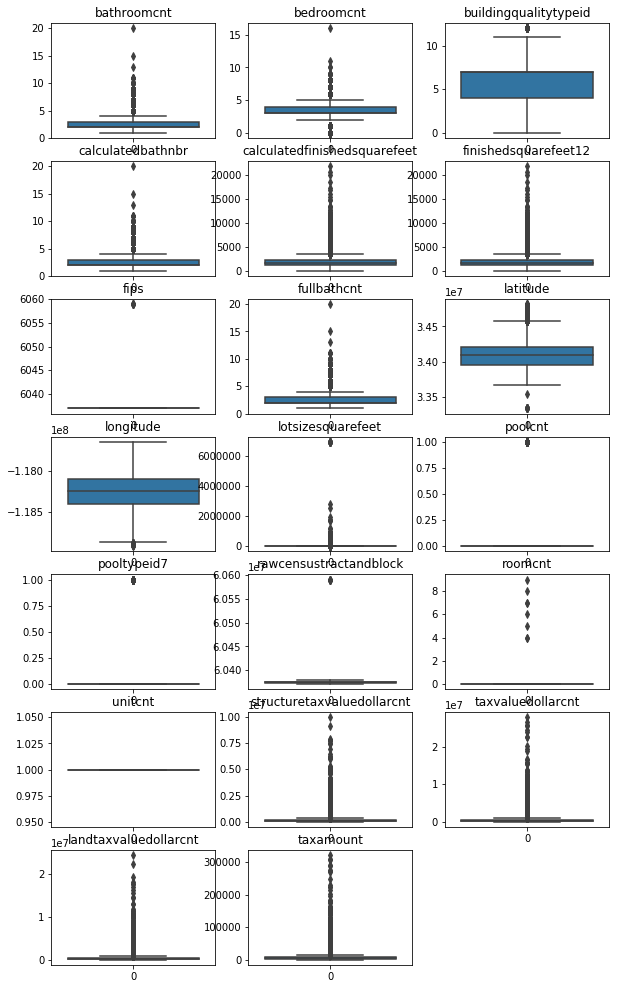

In [56]:
plt.figure(figsize=(10, 30))

for i, col in enumerate(df_single_units[x_floats]):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df_single_units[x_floats][col]
    plt.subplot(12, 3, plot_number)
    plt.title(col)
#     ax.set(xscale='log', yscale='log')
    sns.boxplot(data=series)
    hspace = 0.4

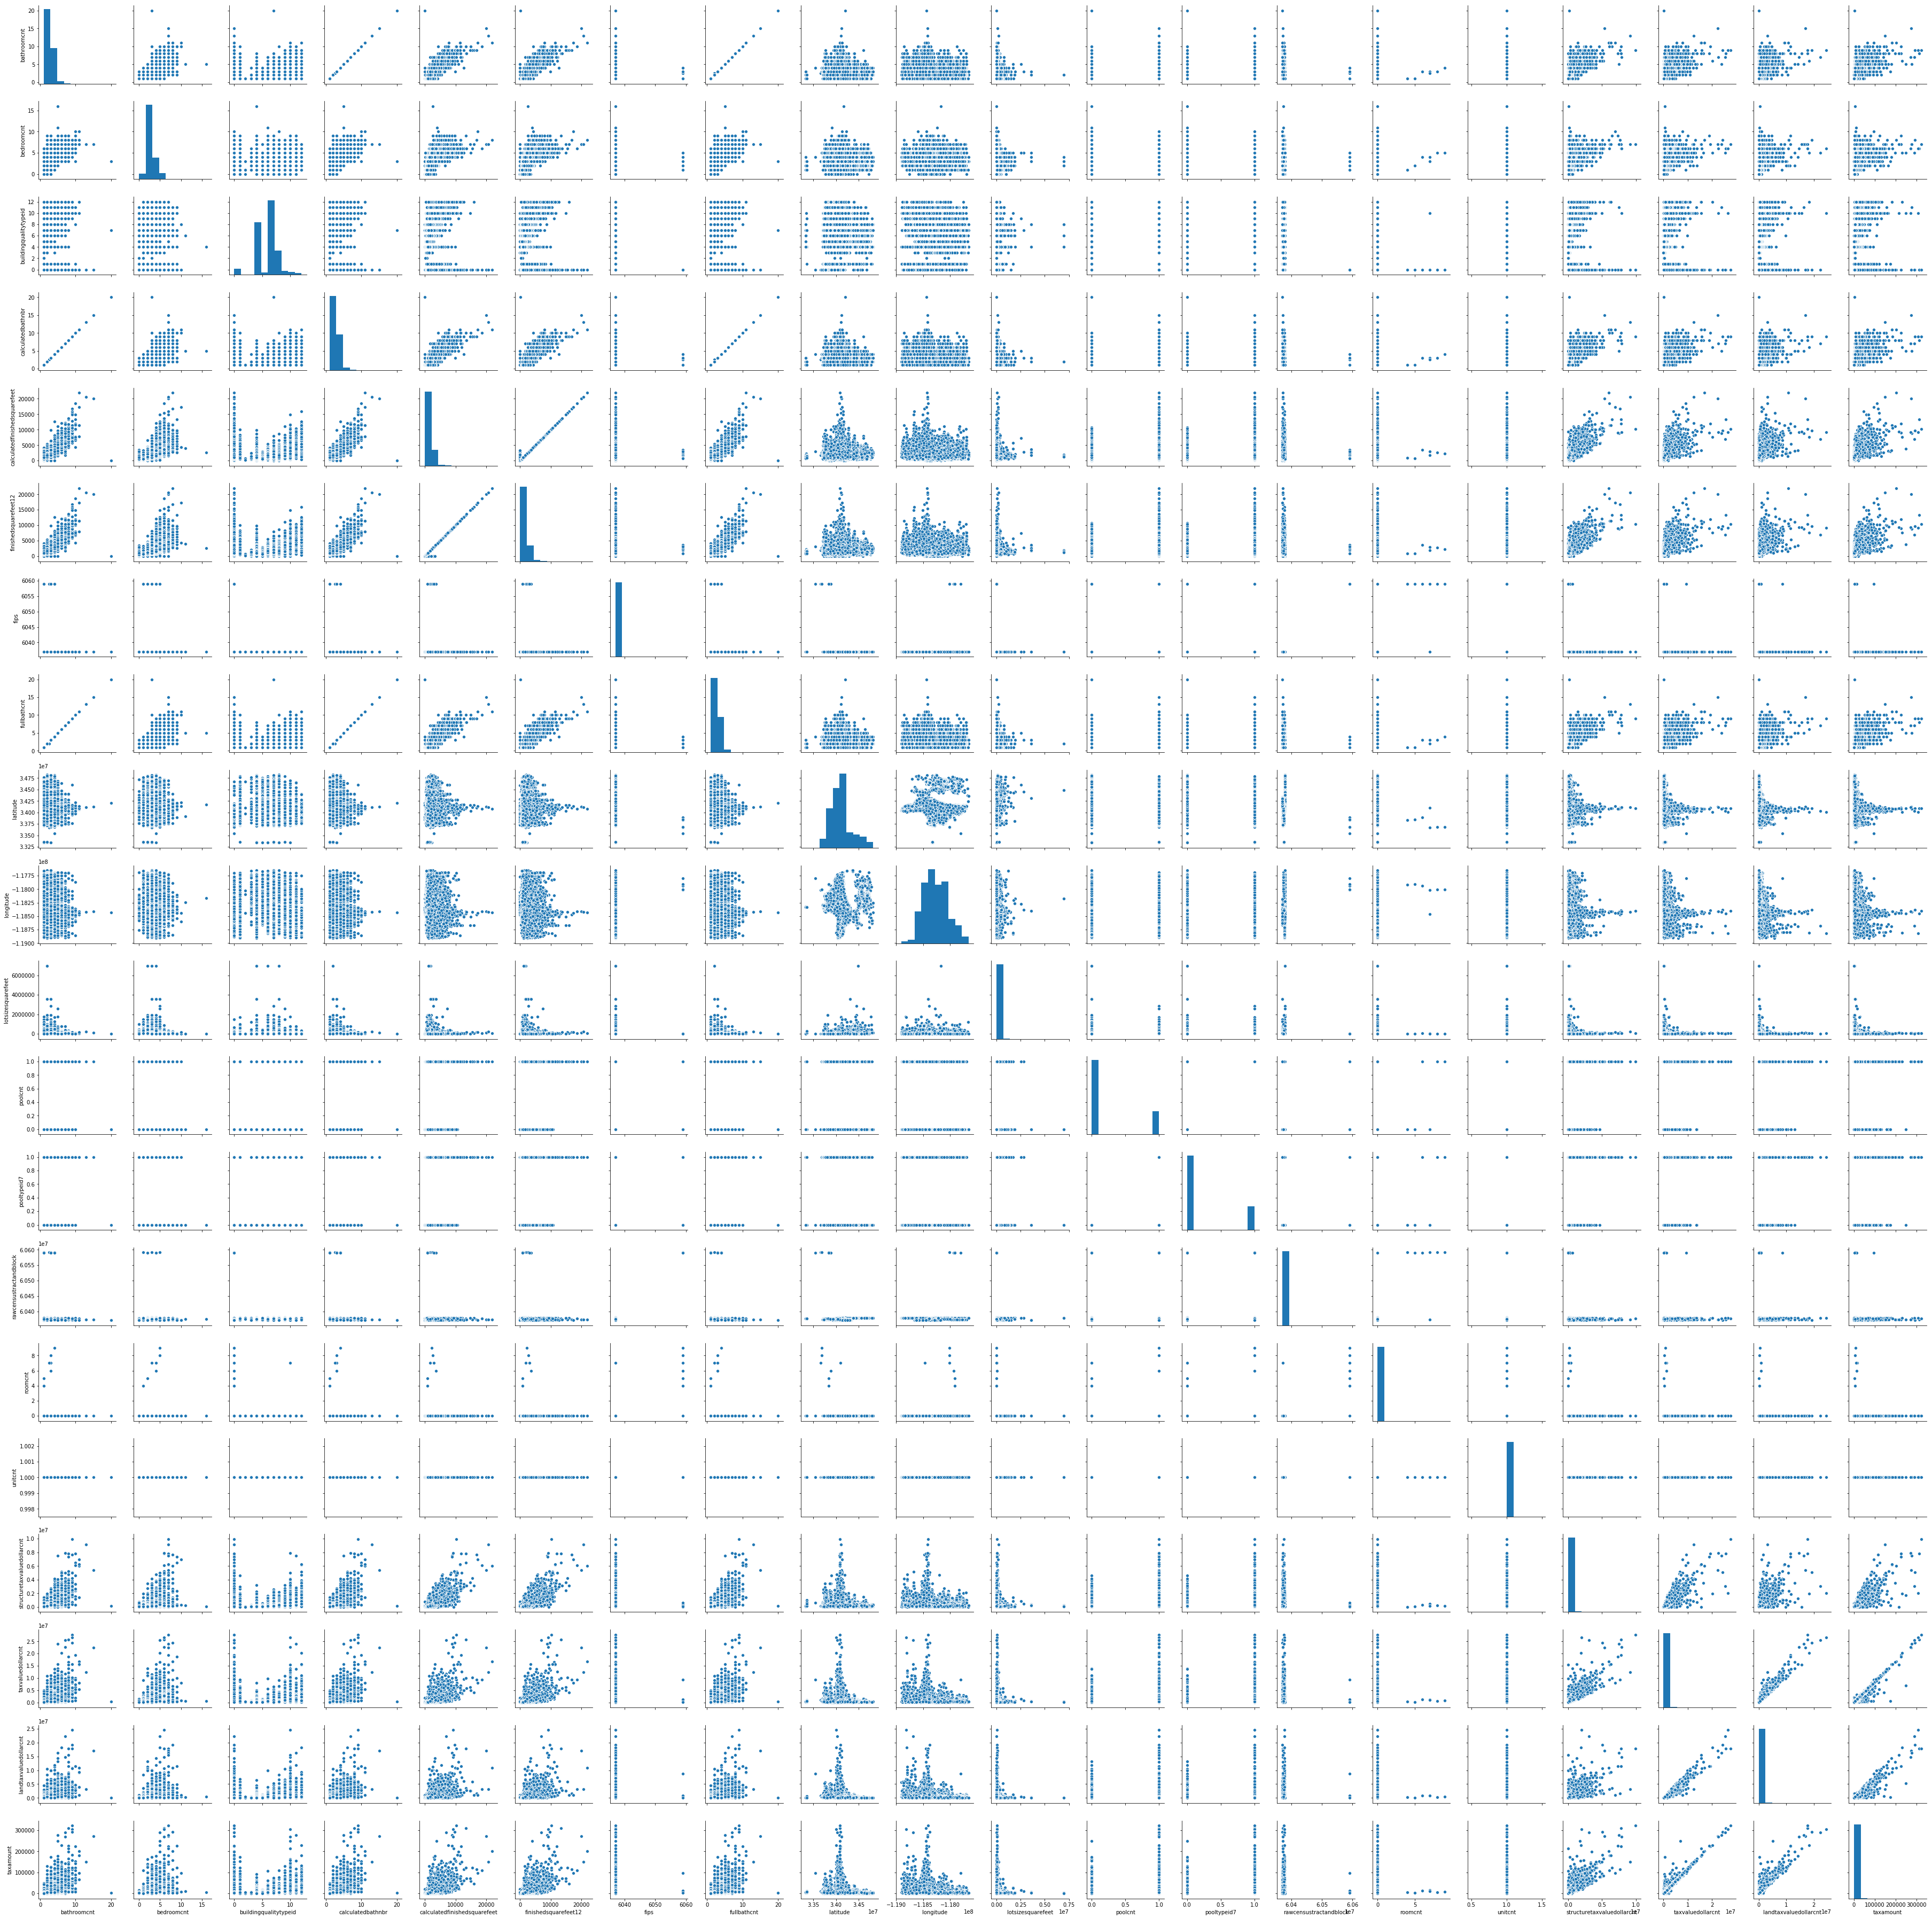

In [266]:
sns.pairplot(df_single_units[x_floats])
plt.show()

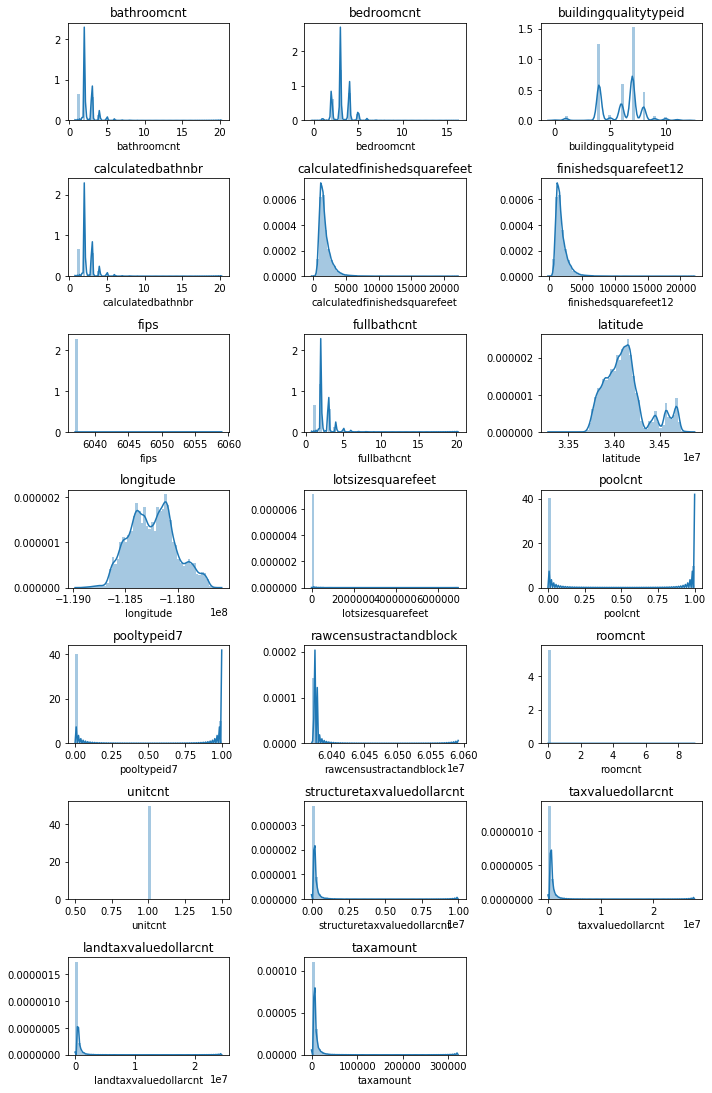

In [57]:
plt.figure(figsize=(10, 30))

for i, col in enumerate(df_single_units[x_floats]):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df_single_units[x_floats][col]
    plt.subplot(14, 3, plot_number)
    plt.title(col)
    plt.tight_layout()
    sns.distplot(series)

<Figure size 1440x1440 with 0 Axes>

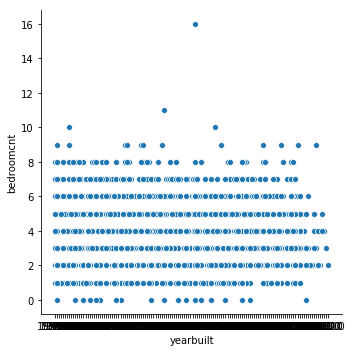

In [58]:
plt.figure(figsize=(20,20))
sns.relplot(y='bedroomcnt', x='yearbuilt', data=df_single_units)
plt.show()

In [59]:
def show_relplots(df, col1, col2, hue):
    return sns.relplot(x=col1, y=col2, data=df, hue=hue)

In [61]:
df_single_units[x_floats]

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,rawcensustractandblock,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,2.00,3.00,4.00,2.00,"1,684.00","1,684.00","6,037.00",2.00,"34,280,990.00","-118,488,536.00","7,528.00",0.00,0.00,"60,371,066.46",0.00,1.00,"122,754.00","360,170.00","237,416.00","6,735.88"
2,3.00,2.00,4.00,3.00,"2,217.00","2,217.00","6,037.00",3.00,"34,136,312.00","-118,175,032.00","11,423.00",0.00,0.00,"60,374,638.00",0.00,1.00,"61,994.00","119,906.00","57,912.00","11,484.48"
5,4.00,4.00,1.00,4.00,"3,067.00","3,067.00","6,037.00",4.00,"33,870,089.00","-118,402,768.00","2,708.00",0.00,0.00,"60,376,210.04",0.00,1.00,"880,650.00","2,447,951.00","1,567,301.00","27,126.57"
6,1.00,2.00,7.00,1.00,"1,297.00","1,297.00","6,037.00",1.00,"33,899,475.00","-118,212,720.00","6,677.00",0.00,0.00,"60,375,416.05",0.00,1.00,"64,549.00","111,521.00","46,972.00","2,304.97"
10,2.00,2.00,7.00,2.00,"1,417.00","1,417.00","6,037.00",2.00,"34,164,671.00","-118,477,995.00","8,279.00",0.00,0.00,"60,371,414.00",0.00,1.00,"55,396.00","105,954.00","50,558.00","1,443.69"
11,4.00,5.00,1.00,4.00,"3,080.00","3,080.00","6,037.00",4.00,"34,072,220.00","-118,547,322.00","7,052.00",0.00,0.00,"60,372,626.01",0.00,1.00,"559,040.00","1,090,127.00","531,087.00","13,428.94"
12,2.00,3.00,7.00,2.00,"1,484.00","1,484.00","6,037.00",2.00,"34,189,804.00","-118,339,183.00","8,214.00",0.00,0.00,"60,373,110.00",0.00,1.00,"29,551.00","70,119.00","40,568.00",832.35
19,3.00,3.00,4.00,3.00,"1,727.00","1,727.00","6,037.00",3.00,"34,164,085.00","-118,528,595.00","6,171.00",0.00,0.00,"60,371,395.02",0.00,1.00,"108,985.00","416,279.00","307,294.00","5,194.00"
20,1.00,2.00,7.00,1.00,840.00,840.00,"6,037.00",1.00,"33,858,594.00","-118,188,672.00","4,444.00",0.00,0.00,"60,375,703.03",0.00,1.00,"122,952.00","260,249.00","137,297.00","3,211.31"
23,4.00,3.00,4.00,4.00,"3,749.00","3,749.00","6,037.00",4.00,"33,969,828.00","-118,396,647.00","10,926.00",0.00,0.00,"60,372,770.01",0.00,1.00,"319,449.00","1,194,279.00","874,830.00","14,747.98"


In [62]:
len(x_floats)

20

In [ ]:
sns.swarmplot(x="yearbuilt", y='calculatedfinishedsquarefeet', data=df_single_units,  palette="Set2")
# ax = sns.boxplot(x="yearbuilt_bin", y="calculatedfinishedsquarefeet", data=df_single_units,
#         showcaps=True,boxprops={'facecolor':'None'},
#         showfliers=True,whiskerprops={'linewidth':0})
ax.set(xlabel='Year built', ylabel='Calculated Finished Sq Ft')

In [ ]:
plt.figure(figsize=(10, 30))

for i, col1, col2 in enumerate(zip(df_single_units[x_objects],df_single_units[x_floats])):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    plt.subplot(12, 3, plot_number)
    plt.title(col1, 'vs', col2)
#     ax.set(xscale='log', yscale='log')
    sns.swarmplot(x=df_single_units[x_objects][col1] ,y=df_single_units[x_floats][col2],data=series)
    hspace = 0.4

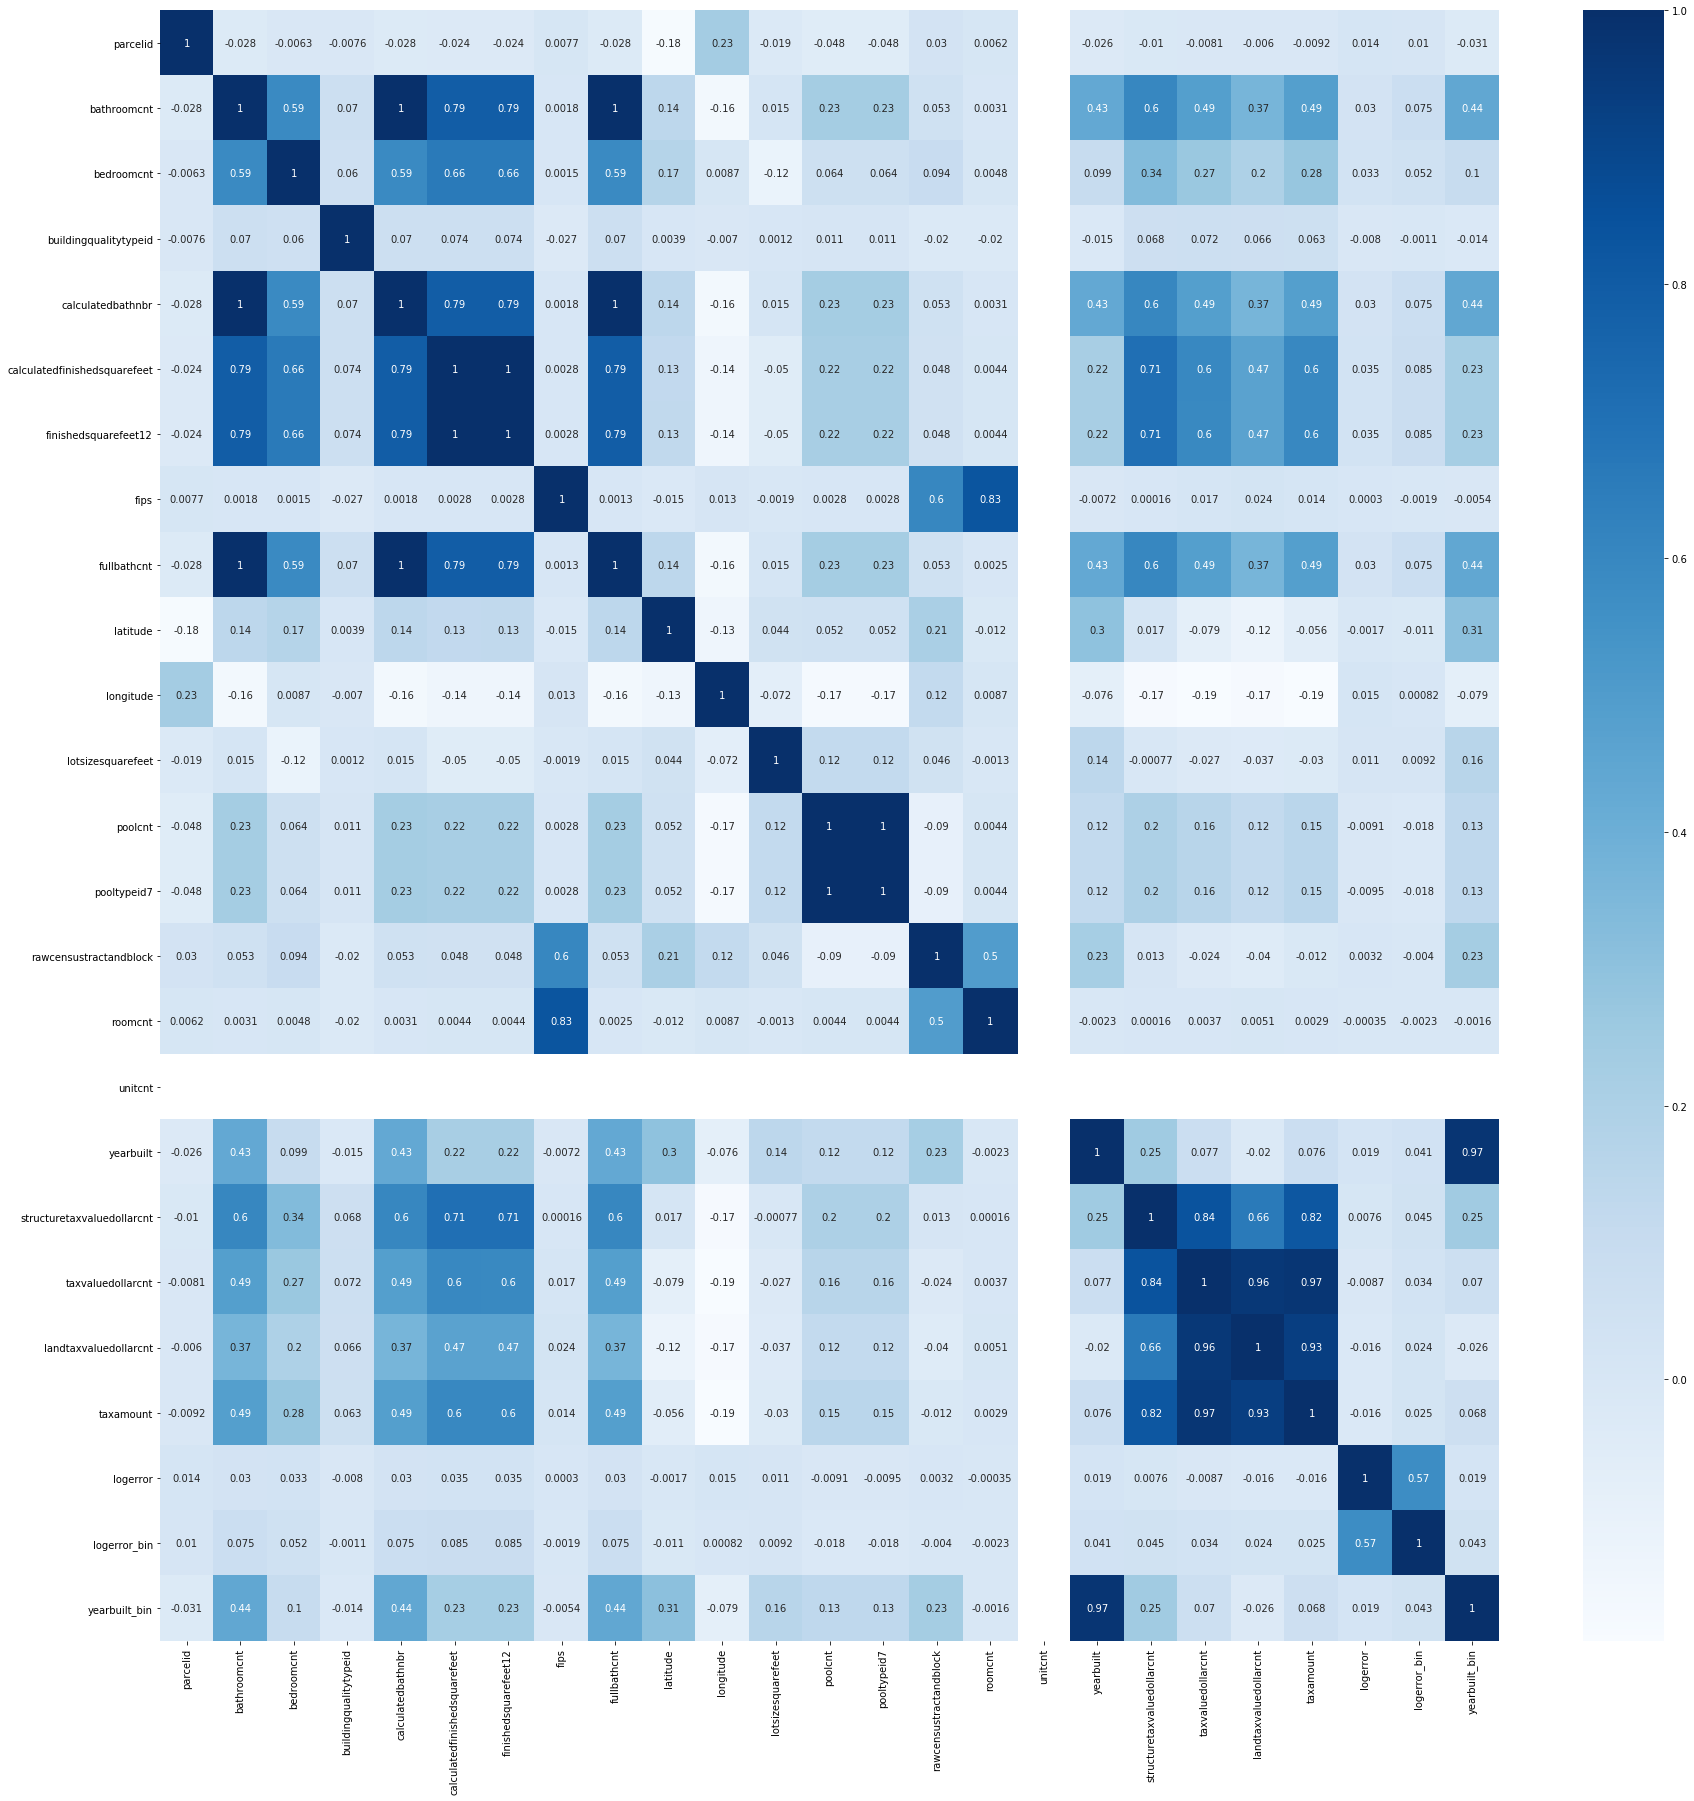

In [398]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_single_units.corr(),cmap='Blues', annot=True)

### Binning data


In [65]:
df_single_units['logerror_bin'] = pd.qcut(df_single_units.logerror, 6, labels=False)

In [66]:
df_single_units['yearbuilt'] = df_single_units['yearbuilt'].astype(float)

In [67]:
df_single_units['yearbuilt_bin'] = pd.qcut(df_single_units.yearbuilt, 8, labels=False)

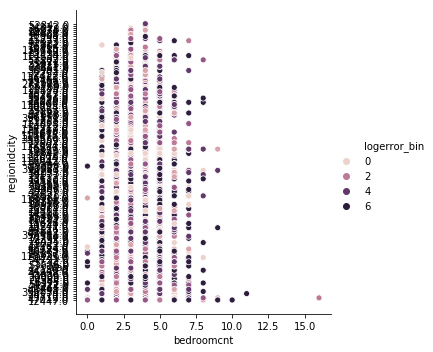

In [68]:
show_relplots(df_single_units, x_floats[1], x_objects[2], hue=df_single_units.logerror_bin)

### Chi-squared Test

In [70]:
df_single_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72614 entries, 0 to 77612
Data columns (total 39 columns):
parcelid                        72614 non-null int64
bathroomcnt                     72614 non-null float64
bedroomcnt                      72614 non-null float64
buildingqualitytypeid           72614 non-null float64
calculatedbathnbr               72614 non-null float64
calculatedfinishedsquarefeet    72614 non-null float64
finishedsquarefeet12            72614 non-null float64
fips                            72614 non-null float64
fullbathcnt                     72614 non-null float64
latitude                        72614 non-null float64
longitude                       72614 non-null float64
lotsizesquarefeet               72614 non-null float64
poolcnt                         72614 non-null float64
pooltypeid7                     72614 non-null float64
propertycountylandusecode       72614 non-null object
propertyzoningdesc              72614 non-null object
rawcensustracta

In [71]:
### taxdelinquency year shows null values when put into a crosstab table

In [75]:
tbl_1 = pd.crosstab(df_single_units['logerror_bin'], df_single_units['yearbuilt_bin'], margins=True)
tbl_1

yearbuilt_bin,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
logerror_bin,,,,,,,,,
0,2345,2048,1644,1651,1243,1221,1186,880,12218
1,1340,1550,1568,1787,1453,1548,1569,1406,12221
2,1054,1285,1481,1672,1336,1648,1761,1711,11948
3,1150,1313,1448,1704,1294,1640,1790,1822,12161
4,1444,1501,1425,1574,1250,1621,1574,1568,11957
5,1835,1712,1554,1488,1243,1491,1466,1304,12093
All,9168,9409,9120,9876,7819,9169,9346,8691,72598


In [76]:
stat, p, dof, expected = stats.chi2_contingency(tbl_1)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)


Dependent (reject H0)
0.0


#### Null hyp: There is no signicant difference between the logerror (bins) and year built (bins).

#### Reject null hyp. Therefore, the 

### T test

In [74]:
stats.ttest_ind(df_single_units.logerror, df.logerror)

Ttest_indResult(statistic=-1.3437822917219817, pvalue=0.17902006517632912)

#### The t-test shows that the difference of logerror between single family homes and all the homes in the sample are not different. So we can say that the logerror is not significantly driven by 'single family homes'.

In [392]:
df_single_units[x_floats].head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,rawcensustractandblock,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,2.00,3.00,4.00,2.00,"1,684.00","1,684.00","6,037.00",2.00,"34,280,990.00","-118,488,536.00","7,528.00",0.00,0.00,"60,371,066.46",0.00,1.00,"122,754.00","360,170.00","237,416.00","6,735.88"
2,3.00,2.00,4.00,3.00,"2,217.00","2,217.00","6,037.00",3.00,"34,136,312.00","-118,175,032.00","11,423.00",0.00,0.00,"60,374,638.00",0.00,1.00,"61,994.00","119,906.00","57,912.00","11,484.48"
3,2.00,2.00,4.00,2.00,839.00,839.00,"6,037.00",2.00,"33,755,800.00","-118,309,000.00","70,859.00",0.00,0.00,"60,372,963.00",0.00,1.00,"171,518.00","244,880.00","73,362.00","3,048.74"
5,4.00,4.00,1.00,4.00,"3,067.00","3,067.00","6,037.00",4.00,"33,870,089.00","-118,402,768.00","2,708.00",0.00,0.00,"60,376,210.04",0.00,1.00,"880,650.00","2,447,951.00","1,567,301.00","27,126.57"
6,1.00,2.00,7.00,1.00,"1,297.00","1,297.00","6,037.00",1.00,"33,899,475.00","-118,212,720.00","6,677.00",0.00,0.00,"60,375,416.05",0.00,1.00,"64,549.00","111,521.00","46,972.00","2,304.97"


In [393]:
df_single_units[x_objects].head()

,propertycountylandusecode,propertyzoningdesc,regionidcity,regionidcounty,regionidneighborhood,regionidzip,fireplaceflag,assessmentyear,taxdelinquencyyear,censustractandblock,airconditioningdesc,heatingorsystemdesc,propertylandusedesc,transactiondate
0,0100,LARS,12447.0,3101.0,31817.0,96370.0,nan,2015.0,nan,60371066461001.0,Central,Central,Single Family Residential,2016-01-01
2,0100,PSR6,47019.0,3101.0,275411.0,96293.0,nan,2015.0,nan,60374638003004.0,Central,Central,Single Family Residential,2016-01-01
3,010C,LAR3,12447.0,3101.0,54300.0,96222.0,nan,2015.0,nan,60372963002002.0,Central,Central,Condominium,2016-01-02
5,0100,HBR3YY,29712.0,3101.0,nan,96109.0,nan,2015.0,nan,60376210044006.0,Central,Central,Single Family Residential,2016-01-02
6,0100,CORH*,24174.0,3101.0,nan,96091.0,nan,2015.0,nan,60375416053007.0,0,Floor/Wall,Single Family Residential,2016-01-02


## Clustering

### Clustering the target variable, logerror

     k                  sse
0    1             2,056.47
1    2             1,355.15
2    3               996.13
3    4               689.26
4    5               516.18
5    6               382.17
6    7               307.14
7    8               244.42
8    9               197.41
9   10               166.58
10  11               142.88
11  12               123.21
12  13               104.16
13  14                87.10


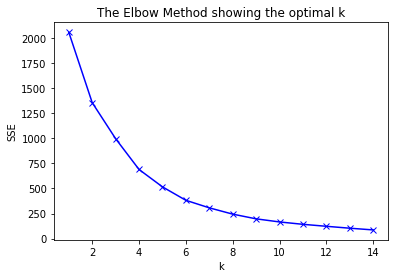

In [80]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_single_units[['logerror']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_single_units[['logerror']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<Figure size 1440x1440 with 0 Axes>

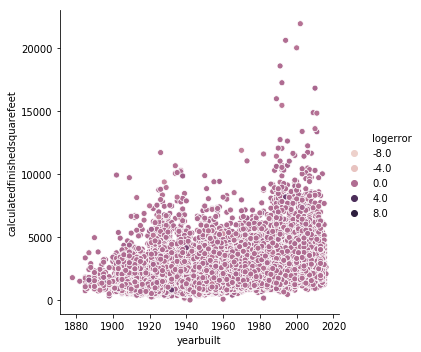

In [110]:
df_single_units['cluster_target'] = kmeans.predict(df_single_units[['logerror']])
df_single_units.cluster_target = 'cluster_' + (df_single_units.cluster_target + 1).astype('str')
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='yearbuilt', y='calculatedfinishedsquarefeet', hue='logerror')

<Figure size 1440x1440 with 0 Axes>

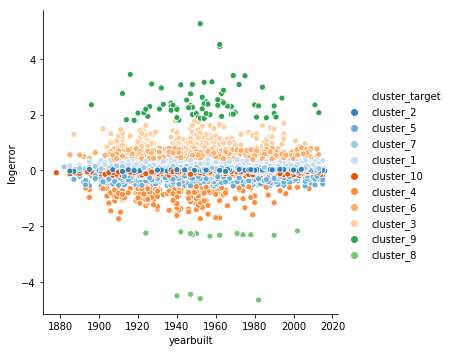

In [122]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='yearbuilt', y='logerror', hue='cluster_target', palette='tab20c')

### Centroids of clustering with logerror only

In [114]:
kmeans.cluster_centers_

array([[ 2.36372237e-01],
       [ 5.66589076e-05],
       [ 1.10234973e+00],
       [-8.50443457e-01],
       [-2.85781368e-01],
       [ 5.45205508e-01],
       [ 7.37664769e-02],
       [-2.85302165e+00],
       [ 2.46651202e+00],
       [-8.34621627e-02]])

#### These do not tell us anything.

<Figure size 1440x1440 with 0 Axes>

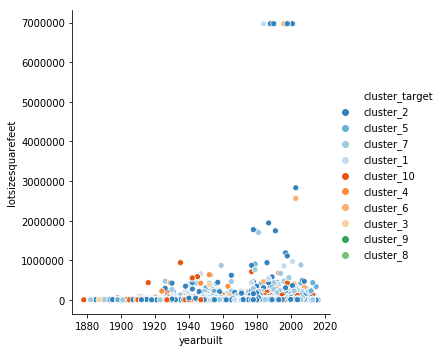

In [125]:
plt.figure(figsize=(20,20))
sns.relplot(data=df_single_units, x='yearbuilt', y='lotsizesquarefeet', hue='cluster_target', palette='tab20c')

In [123]:
df_single_units.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyyear', 'censustractandblock',
       'airconditioningdesc', 'heatingorsystemdesc', 'propertylandusedesc',
       'logerror', 'transactiondate', 'logerror_bin', 'yearbuilt_bin',
       'cluster', 'cluster_target'],
      dtype='object')

## Clustering Independent Variables

### Location

In [ ]:
df_lat_and_long = df_single_units

     k                  sse
0    1             2,056.47
1    2             1,355.15
2    3               996.13
3    4               689.26
4    5               516.18
5    6               382.17
6    7               307.14
7    8               244.42
8    9               197.41
9   10               166.58
10  11               142.88
11  12               123.21
12  13               104.16
13  14                87.10


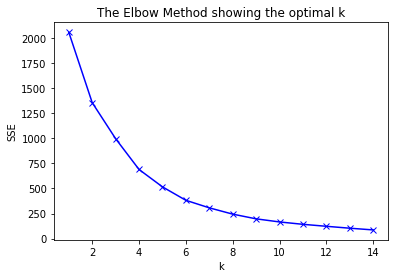

In [80]:
ks = range(1,15)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_single_units[['logerror']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_single_units[['logerror']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)